In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
# Read file CSV 
file_path = 'C:/Users/Admin/Desktop/fraud_detection_project/data/processed/clean_credit_card_transactions.csv'

df = pd.read_csv(file_path)

In [10]:
# Overview of data
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_zipcode,age,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,trans_day_of_week,age_group
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,28705.0,31,2019,1,1,0,0,18,Tuesday,Aged 29-39
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,Unknown,41,2019,1,1,0,0,44,Tuesday,Aged 39-49
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,83236.0,57,2019,1,1,0,0,51,Tuesday,Aged 49-59
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,Unknown,52,2019,1,1,0,1,16,Tuesday,Aged 49-59
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,22844.0,33,2019,1,1,0,3,6,Tuesday,Aged 29-39


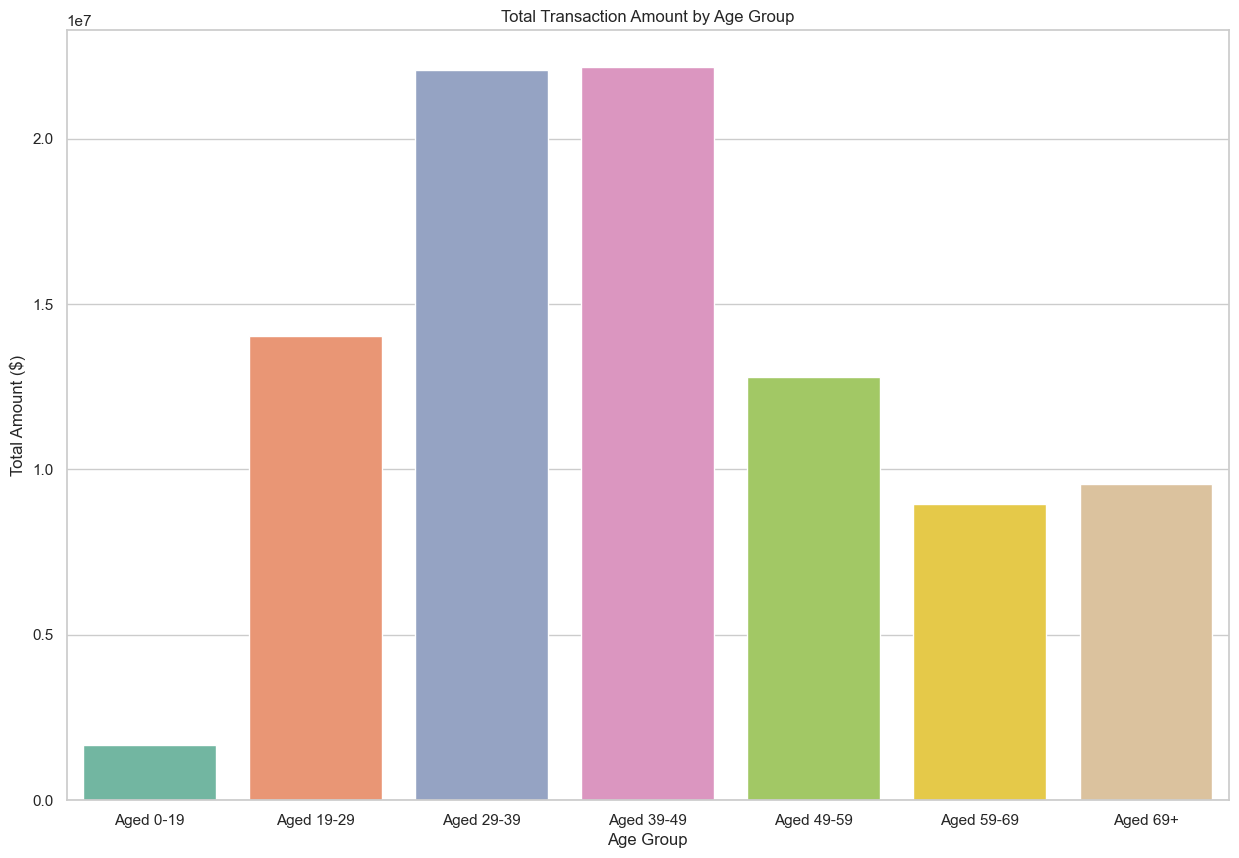

In [ ]:
# 1. Total Transaction Amount by Age Group

# Group by 'age_group' and sum the 'amt' for each age_group
age_amout = df.groupby("age_group")["amt"].sum().reset_index()

# Setup for the plot
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(15, 10))
plt.pie(data=age_amout, x='age_group', y='amt',hue='age_group', palette='Set2')

# Set labels and title
plt.title('Total Transaction Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount ($)')

# Save the graph
image_path = r"C:\Users\Admin\Desktop\fraud_detection_project\reports\figures\age\total_transaction_amount_by_age_group.png"
plt.savefig(image_path)

plt.show()


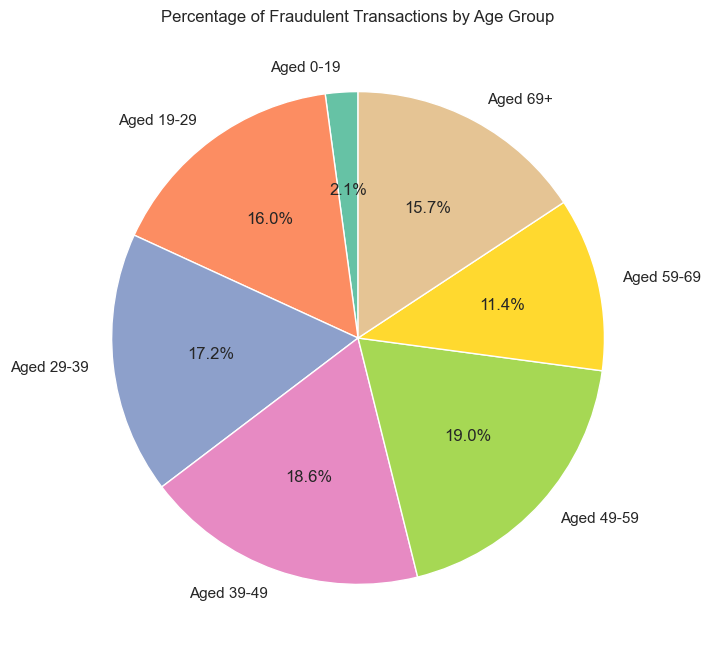

In [12]:
# 2. Which age_group have most fraud tranactions ?

# Filter Fraud Transaction
fraud_transaction = df[df["is_fraud"] == 1]

# Group by age_group
fraud_counts = fraud_transaction.groupby("age_group").size().reset_index(name="counts")

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Percentage Fraud of each Age Group
fraud_counts['percentage'] = (fraud_counts['counts'] / fraud_counts['counts'].sum()) * 100

# Create a bar plot for the count of fraudulent transactions by category
plt.figure(figsize=(12, 8))
plt.pie(fraud_counts['counts'], labels=fraud_counts['age_group'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(fraud_counts)))
plt.title('Percentage of Fraudulent Transactions by Age Group')

# Save the graph
image_path = r"C:\Users\Admin\Desktop\fraud_detection_project\reports\figures\age\percentage_of_fraudulent_transactions_by_age_group.png"

plt.savefig(image_path)

# Show the plot
plt.show()


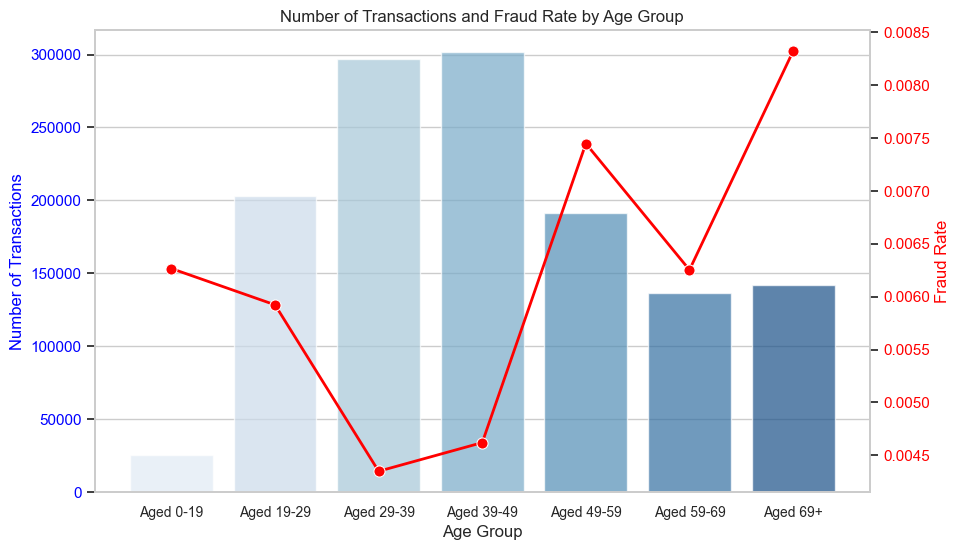

In [13]:
# 3. Number of Transactions and Fraud Rate by Age Group

# Number of transaction by age_group
transaction_count = df.groupby('age_group').size().reset_index(name='counts')

# Fraud Rate by age_group
fraud_rate = df.groupby('age_group')['is_fraud'].mean().reset_index()

# Merge two table using age_group
merged_data = pd.merge(transaction_count, fraud_rate, on='age_group')

# Plot the graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graph for number of transaction
sns.barplot(data=merged_data, x='age_group', y='counts', ax=ax1, hue='age_group', palette='Blues', alpha=0.7)
ax1.set_xlabel('Age Group', fontsize=12)
ax1.set_ylabel('Number of Transactions', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', labelsize=10)


# Create y axis for Fraud Rate
ax2 = ax1.twinx()
sns.lineplot(data=merged_data, x='age_group', y='is_fraud', ax=ax2, color='red', marker="o", linewidth=2, markersize=8)
ax2.set_ylabel('Fraud Rate', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False)


# Label for Graph
plt.title('Number of Transactions and Fraud Rate by Age Group')

# Save the graph
image_path = r"C:\Users\Admin\Desktop\fraud_detection_project\reports\figures\age\number_of_transactions_and_fraud_rate_by_age_group.png"
plt.savefig(image_path)

plt.show()